# Lab 4- Data Analysis

# **Assignment Submission Guidelines**


Please follow the guidelines below for submitting your assignment:

1. **Submission Deadline:**
   - All assignments must be submitted **no later than 11:59 PM Sunday (10/26) Midnight**.
   - Late submissions will not be accepted unless prior arrangements have been made by the instructor.

2. **Submission Platform:**
   - Submit your assignment through **Canvas**. Ensure that you upload the files to the correct assignment link.

3. **Required Files:**
   - **Jupyter Notebook file (.ipynb):** Submit the Jupyter Notebook file you used to complete the assignment. The file should contain your well-commented code.
   - **PDF Version (.pdf file):** Additionally, submit a PDF version of your Python code. This can be a printout or export of your script, showing all the code with any necessary explanations or output results included.

4. **File Naming Convention:**
   - Please name your files as follows: `Lastname_Firstname_AssignmentName`
   - Example: `Alex_John_Lab4.ipynb` and `Alex_Johb_Lab4.pdf`

5. **Technical Issues:**
   - If you encounter any technical issues with Canvas or your submission, please contact the TAs immediately **before the deadline** to avoid penalties.


Download SUSY Dataset

The information about the dataset can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We'll start with the [SUSY Dataset](https://archive.ics.uci.edu/ml/datasets/SUSY).



In [1]:
#!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz

In [2]:
#!gunzip SUSY.csv.gz

## Exercise 1: (5 Points)
(a) Load data set and create a new data file of the first million.


(b) Each row represents a LHC collision event. Each column contains some observable from that event. Create the Variables as "VarNames" and "RawNames" The variable names are ([based on documentation](https://archive.ics.uci.edu/ml/datasets/SUSY)):

In [3]:
### New datafile with one million rows.
#!head -1000000 SUSY.csv > SUSY-small.csv

In [1]:
FILENAME = "SUSY-small.csv"
VarNames = ['signal', 'l_1_pT', 'l_1_eta','l_1_phi',
            'l_2_pT', 'l_2_eta', 'l_2_phi',
           "MET", "MET_phi", "MET_rel", "axial_MET", "M_R",
           "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
RawNames = [ 'l_1_pT', 'l_1_eta','l_1_phi',
            'l_2_pT', 'l_2_eta', 'l_2_phi',
           "MET", "MET_phi"]
FeatureNames = list(set(VarNames[1:]).difference(RawNames))
FeatureNames

['MT2',
 'cos_theta_r1',
 'dPhi_r_b',
 'M_TR_2',
 'axial_MET',
 'R',
 'M_Delta_R',
 'MET_rel',
 'S_R',
 'M_R']

## Exercise 2: (5 Points)

Read the new data file into a pandas dataframe, and Create dataframes that store only the signal or background.  

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# A NEW DATAFRAME.
df = pd.read_csv(FILENAME, dtype='float64', names=VarNames)

# DATAFRAMES STORING SIG AND BKG.
df_sig = df[df.signal==1] # m1
df_bkg = df[df.signal==0] # m2

## Exercise 3: (5 Points)

plots the signal and background distributions of every variable and skip the first variable, which was the true label.  

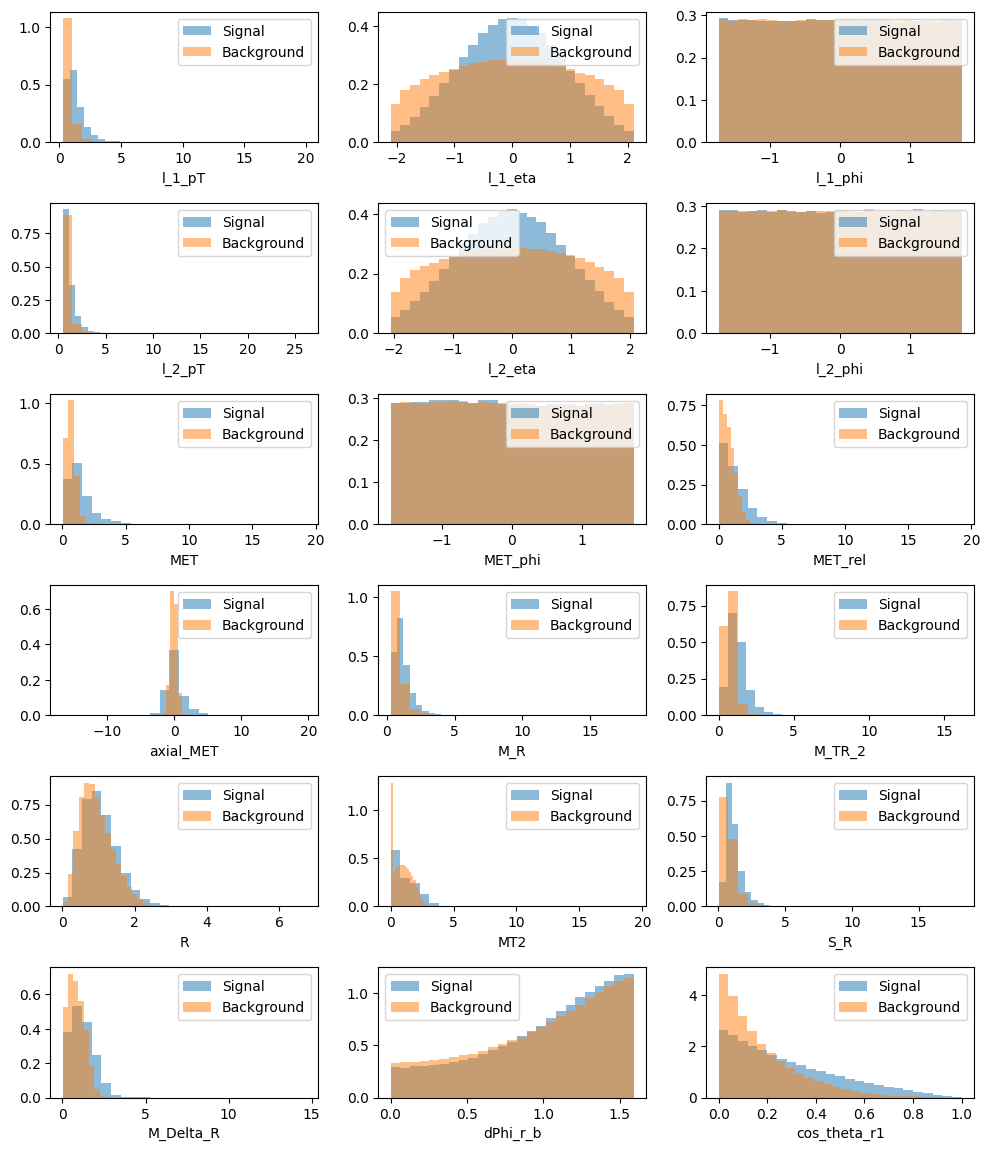

In [8]:
selection_dict={"Signal": df.signal==1,
               "Background": df.signal==0,
               }
def compare_distributions(df, column_name, selections, **kwargs):
    for label, selection in selections.items():
        _=plt.hist(df[selection][column_name], label=label, **kwargs)
        _=plt.legend()
        
# use subplots to stitch figures together.
# Each plot must be assigned a number.
plt.figure(figsize=(10,15))
for i, column_name in enumerate(df.columns[1:]):
    plt.subplot(8,3, i+1) # rows, cols, i plus one if we have more
    compare_distributions(df, column_name, selection_dict,
                          alpha=0.5, density=1, bins=25,
                          stacked=True)
    plt.tight_layout()
    plt.xlabel(column_name)
plt.show()

## Exercise 4: Correlation (30 Points)
### Exercise 4.1 (15 Points)

#### Part a (5 Points)
Write a function that creates pair plots and use it to compare variables in the SUSY sample, separately for low and high-level features. Refer to Lecture week 9 for details. Do not use `seaborn`.



In [4]:
# Function for 1d histogram plot
selection_dict={"Signal": df.signal==1,
               "Background": df.signal==0,
               }
color_map={
    "Signal": "blue",
    "Background": "orange",
}
# Histogram plot function =======================================================
def histo(data=None, explan_var=None, mask=None, **kwargs):
        _=plt.hist(data[mask][explan_var], **kwargs)
        _=plt.xlabel(f"Distribution for {explan_var}")

# Scatter plot function =======================================================
# note, I renamed x,y to explan_var and response_var because using statistical terms made this function easier to write.
def scatter(data=None, explan_var=None, resp_list=None, mask=None, **kwargs):
    for response_var in resp_list:
        _=plt.scatter(data[mask][explan_var], data[mask][response_var], **kwargs)
        _=plt.xlabel(f"{explan_var} vs {response_var}")

col_list = df.columns[1:6]
n = len(col_list)
def pair_plot(mask_dict=None):
    # The pair plot is done in a for loop.
    plot_i = 0
    plt.figure(figsize=(15,15))
    for label, mask in mask_dict.items():
        color = color_map[label]
        for i, x_column_name in enumerate(col_list):
            for j, y_column_name in enumerate(col_list):
                plot_i +=1
                # change the subplt and legend
                plt.subplot(2*n, n, plot_i)
                if i == j:
                    histo(data=df, color=color, explan_var=x_column_name, mask=mask, label=label,
                        bins=5, alpha=0.5, density=1, stacked=True)
                    plt.title(f"Level: {label}")
                    plt.legend()
                else:
                    scatter(data=df, color=color, explan_var=x_column_name, label=label,
                            resp_list=[y_column_name], mask=mask)
                    plt.title(f"Level: {label}")
                    plt.legend()
    plt.tight_layout()
pair_plot(mask_dict=selection_dict)

/tmp/ipykernel_22377/466986228.py:45: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/enby_enby/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/enby_enby/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


Error in callback <function flush_figures at 0x7f4244aa3f40> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

#### Part b (5 Points)
Making these plots can be slow because creating each plot initiates a full loop over the data. Make at least one modification to your function in part a to speed it up. Can you propose a different method of creating histograms that would speed up making such pair plots?

In [14]:
# Proposal: Make smaller dataframes instead of applying masks to the original dataframe.
# Function for 1d histogram plot
selection_dict={"Signal": df.signal==1,
               "Background": df.signal==0,
               }
color_map={
    "Signal": "blue",
    "Background": "orange",
}

low_level = df.columns[1:9] 
high_level = df.columns[9:17] 


# Histogram plot function =======================================================
def histo(data=None, explan_var=None, mask=None, **kwargs):
        _=plt.hist(data[mask][explan_var], **kwargs)
        _=plt.xlabel(f"Distribution for {explan_var}")

# Scatter plot function =======================================================
# note, I renamed x,y to explan_var and response_var because using statistical terms made this function easier to write.
def scatter(data=None, explan_var=None, resp_list=None, mask=None, **kwargs):
    for response_var in resp_list:
        _=plt.scatter(data[mask][explan_var], data[mask][response_var], **kwargs)
        _=plt.xlabel(f"{explan_var} vs {response_var}")

def pair_plot(df=None, mask_dict=None, col_list=None):
    # The pair plot is done in a for loop.
    plt.figure(figsize=(25,25))
    n = len(col_list)
    for i, x_column_name in enumerate(col_list):
        for j, y_column_name in enumerate(col_list):
            plt.subplot(n, n, i*n+j+1)
            # change the subplt and legend
            for label, mask in mask_dict.items():
                color = color_map[label]
                # Data is blocked or clustered to make the function run faster =====================================
                subset = df[mask]
                if len(subset) > 10000:
                    subset = subset.sample(10000, random_state=42)
                # Data is blocked or clustered to make the function run faster =====================================
                if i == j:
                    histo(data=subset, color=color, explan_var=x_column_name, mask=mask, label=label,
                        bins=5, alpha=0.5, density=1, stacked=True)
                    plt.title(f"Level: {label}")
                    plt.legend()
                else:
                    scatter(data=subset, color=color, explan_var=x_column_name, label=label,
                            resp_list=[y_column_name], mask=mask)
                    plt.title(f"Level: {label}")
                    plt.legend()
    plt.tight_layout()

/tmp/ipykernel_24447/339293425.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _=plt.hist(data[mask][explan_var], **kwargs)
/tmp/ipykernel_24447/339293425.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _=plt.hist(data[mask][explan_var], **kwargs)
/tmp/ipykernel_24447/339293425.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _=plt.scatter(data[mask][explan_var], data[mask][response_var], **kwargs)
/tmp/ipykernel_24447/339293425.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _=plt.scatter(data[mask][explan_var], data[mask][response_var], **kwargs)
/tmp/ipykernel_24447/339293425.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _=plt.scatter(data[mask][explan_var], data[mask][response_var], **kwargs)
/tmp/ipykernel_24447/339293425.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame i

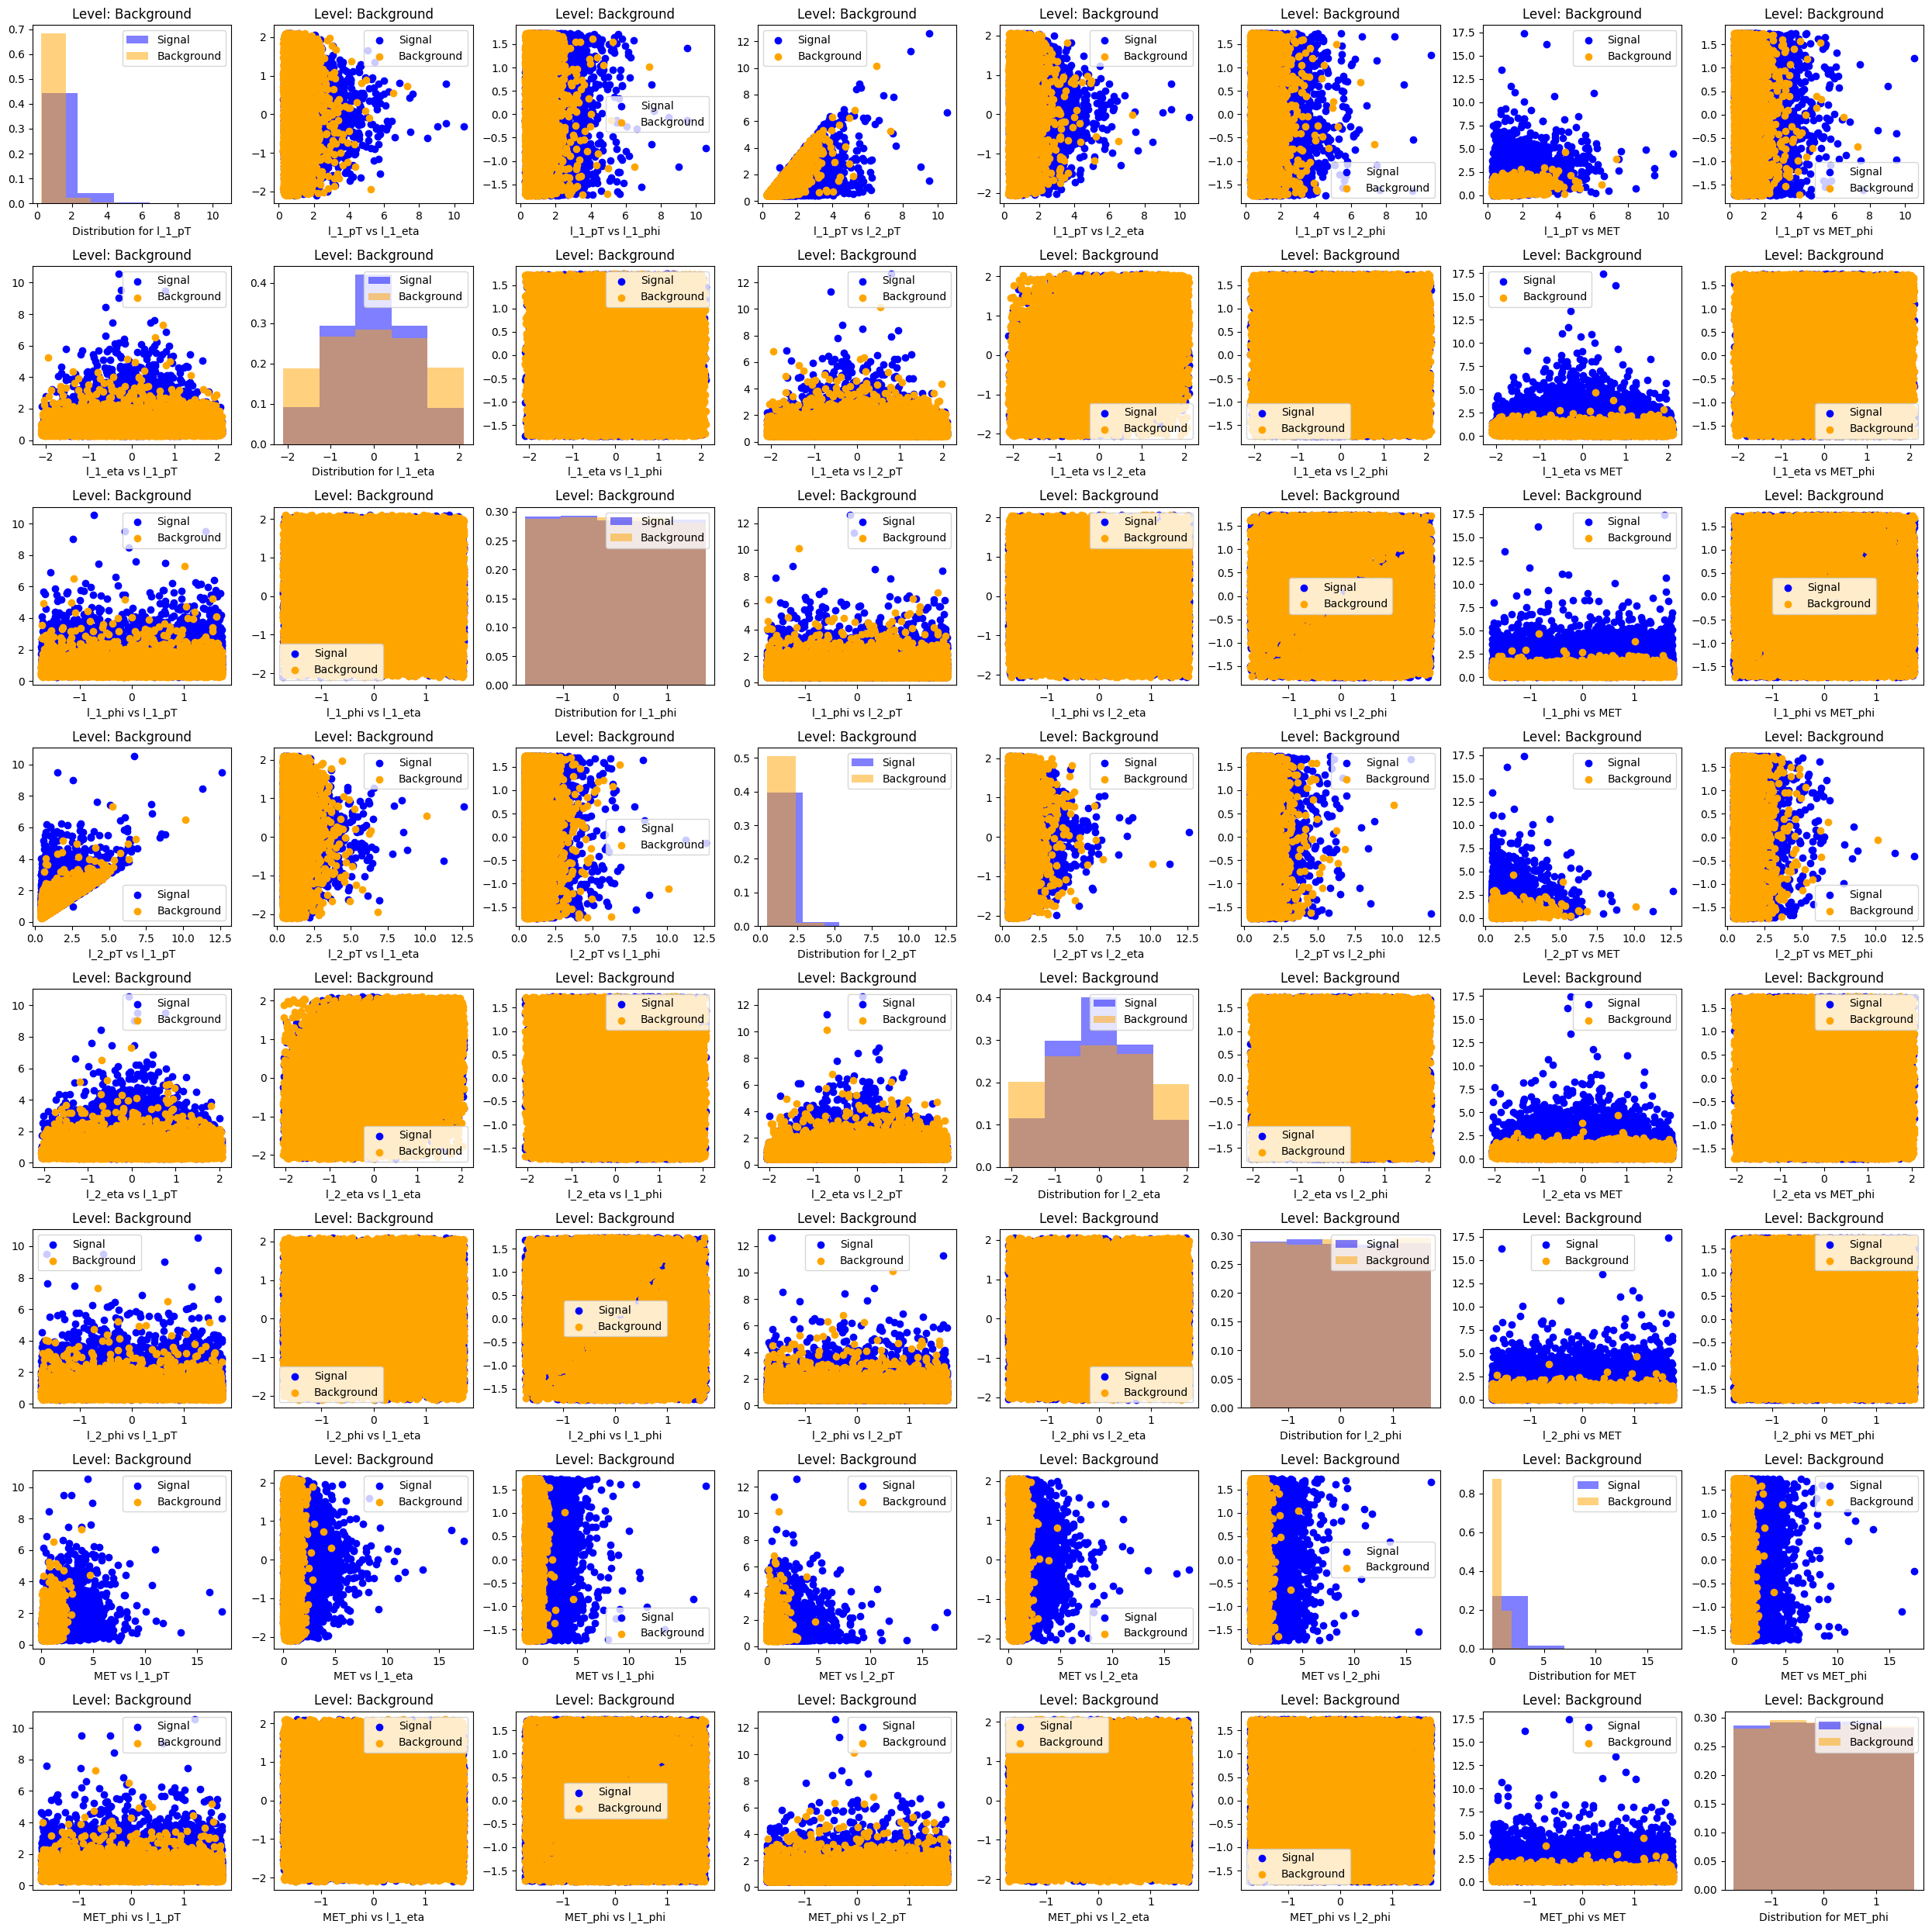

In [15]:
# lower level
pair_plot(df=df, mask_dict=selection_dict, col_list=low_level)

/tmp/ipykernel_24447/339293425.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _=plt.hist(data[mask][explan_var], **kwargs)
/tmp/ipykernel_24447/339293425.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _=plt.hist(data[mask][explan_var], **kwargs)
/tmp/ipykernel_24447/339293425.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _=plt.scatter(data[mask][explan_var], data[mask][response_var], **kwargs)
/tmp/ipykernel_24447/339293425.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _=plt.scatter(data[mask][explan_var], data[mask][response_var], **kwargs)
/tmp/ipykernel_24447/339293425.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _=plt.scatter(data[mask][explan_var], data[mask][response_var], **kwargs)
/tmp/ipykernel_24447/339293425.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame i

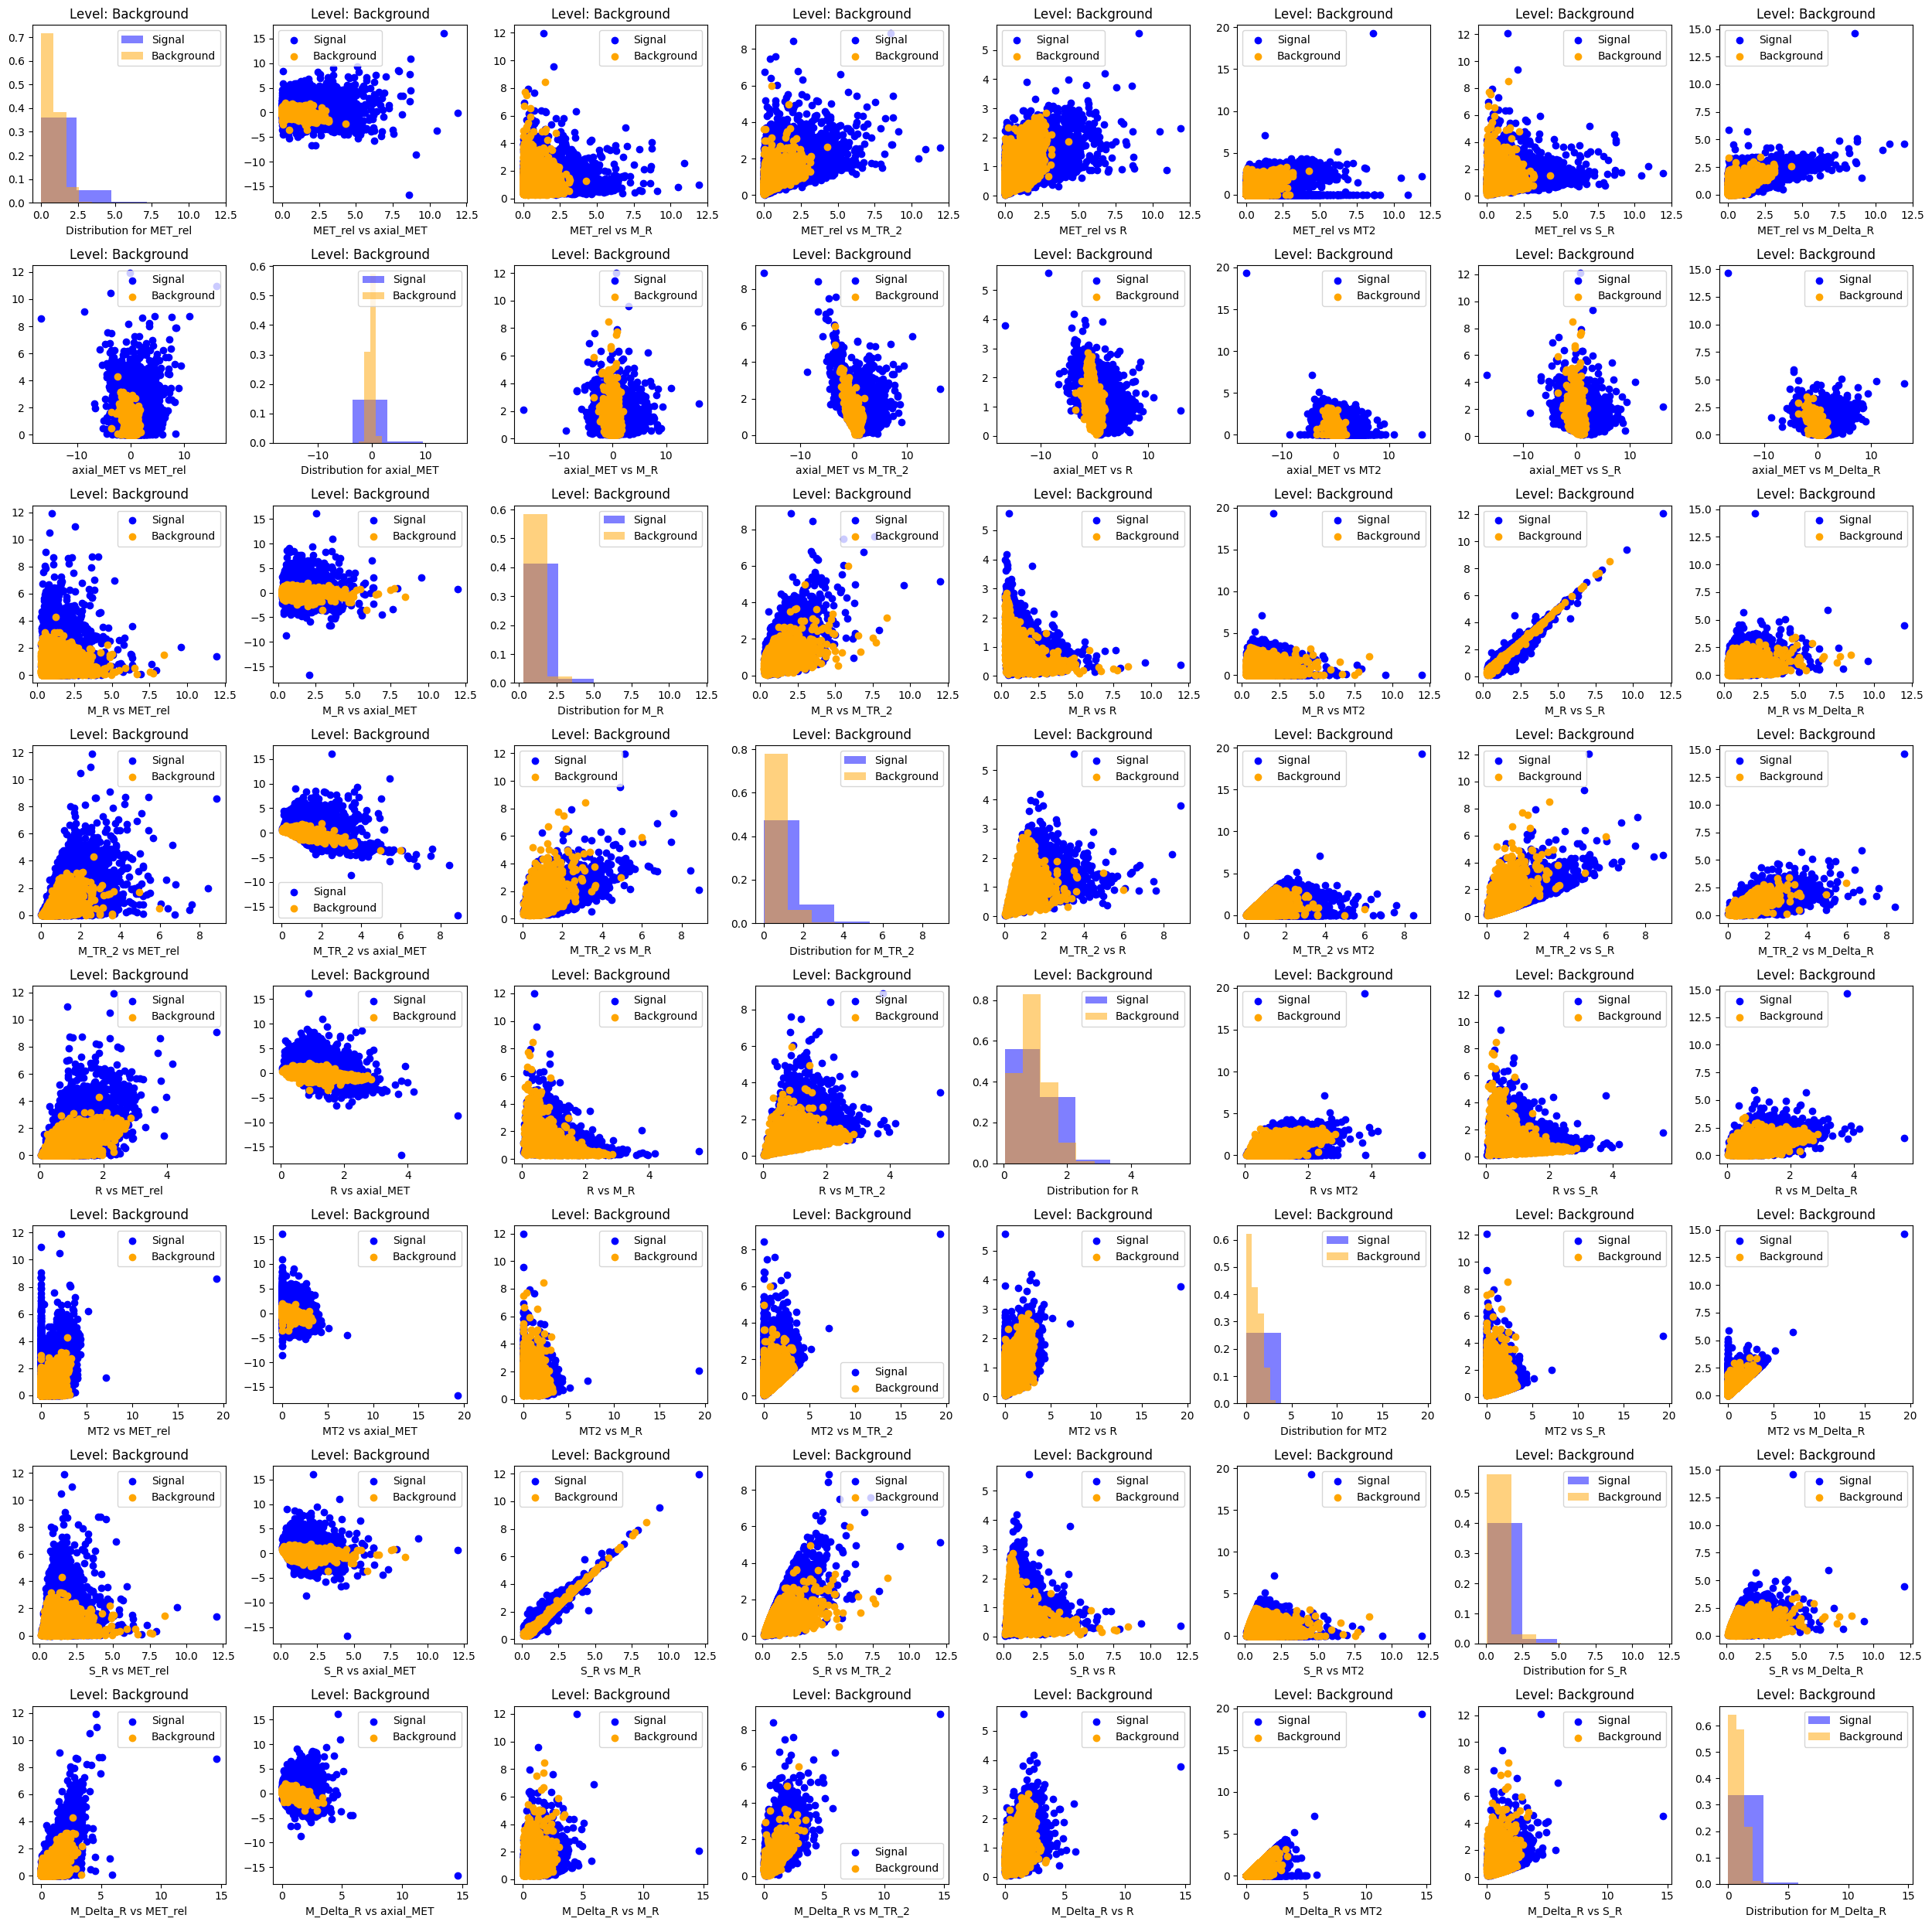

In [16]:
# upper level
pair_plot(df=df, mask_dict=selection_dict, col_list=high_level)



#### Part c (5 Points)
Which observables appear to be best for separating signal from background?

### The higher-level observables look the best for separating signal from background.

In [17]:
print("The higher-level observables look the best for separating signal from background.")

The higher-level observables look the best for separating signal from background.


### Exercise 4.2 (15 Points)

#### Part a (5 Points)
Install [tabulate](https://github.com/astanin/python-tabulate) and use numpy to compute the [covariance matrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) and [correlation matrix](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) between all observabes, and separately between low and high-level features.



In [3]:
import numpy as np
def calculate_cov_and_pearsonsr(data=None):

    # These are "arguements" that can be defined outside.-------------------------------
    selection_dict={"Signal": df.signal==1,
               "Background": df.signal==0,
               }
    low_level = df.columns[1:9] 
    high_level = df.columns[9:17] 
    
    # subsets/samples ===========================================
    sig = df.loc[selection_dict['Signal'], :]
    bkg = df.loc[selection_dict['Background'], :]
    # These are "arguements" that can be defined outside.-------------------------------

    
    parameter_dict = {
        "sig": {},
        "bkg": {}
    }
    
    def compute_matrices(df, label):
        matrices = {}
        groups = {
            "all": df.columns[1:],  # removing signal
            "low": low_level,
            "high": high_level
        }
        for group_name, cols in groups.items():
            values = df[cols].values.T
            cov = np.cov(values).round(2)
            corr = np.corrcoef(values).round(2)
            matrices[group_name] = {"Covariance": cov, "Correlation Coefficient r": corr}
        return matrices

    parameter_dict["sig"] = compute_matrices(sig, "sig")
    parameter_dict["bkg"] = compute_matrices(bkg, "bkg")

    return parameter_dict

parameters = calculate_cov_and_pearsonsr(data=df)
#parameters
#parameters.keys()    
#for key in parameters.keys():
#    for key2 in parameters[key].keys():
#        print(parameters[key][key2])

#### Part b (5 Points)
Use tabulate to create a well formatted table of the covariance and correlation matrices, with nice headings and appropriate significant figures. Embed the table into this notebook.

In [5]:
from IPython.display import HTML, display
import tabulate
print("-----------------------Example of how we can put this into a loop-----------------------")
display(HTML(tabulate.tabulate(parameters['sig']['low']["Correlation Coefficient r"],
                               tablefmt='html',
                               headers=df.columns[1:9])))



-----------------------Example of how we can put this into a loop-----------------------


l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi
1,-0,-0,0.61,-0,0,0.28,-0
-0,1,-0,-0,0.35,-0,-0,-0
-0,-0,1,0,-0,-0.26,0,-0.14
0.61,-0,0,1,-0,0,0.08,-0
-0,0.35,-0,-0,1,-0,0,-0
0,-0,-0.26,0,-0,1,-0,0.03
0.28,-0,0,0.08,0,-0,1,-0
-0,-0,-0.14,-0,-0,0.03,-0,1




#### Part c (5 Points)
Write a function that takes a dataset and appropriate arguments and performs steps a and b.  

In [6]:
def display_covar_and_pearsonsr(data=None):
    parameters = calculate_cov_and_pearsonsr(data)
    # Loop logic to display all the tables in the dictionary------------
    for class_label in parameters:  # "sig", "bkg"
        for group in parameters[class_label]:  # "all", "low", "high"
            if group == "low":
                headers = low_level
            elif group == "high_level":
                headers = high_level
            else:
                headers = data.columns[1:]
            for matrix_type in parameters[class_label][group]:  # "cov", "corr"
                matrix = parameters[class_label][group][matrix_type]
                print(f"{class_label} – {group} – {matrix_type}")

                display(HTML(tabulate.tabulate(matrix,
                               tablefmt='html',
                               headers=headers)))
display_covar_and_pearsonsr(df)

        

sig – all – Covariance


l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0.64,-0,-0,0.36,-0,0,0.25,-0,0.07,-0.04,0.47,0.38,-0.09,-0.05,0.43,0.09,-0.07,0.02
-0,0.75,-0,-0,0.27,-0,-0,-0,-0,-0,-0,-0,0,0,-0,-0,-0,0
-0,-0,1,0,-0,-0.27,0,-0.14,0,-0,0,0,0,0,0,0,0,0
0.36,-0,0,0.55,-0,0,0.06,-0,-0.04,0.08,0.39,0.2,-0.12,-0.12,0.38,-0.02,-0,-0.05
-0,0.27,-0,-0,0.79,-0,0,-0,0,0,-0,-0,0,0,-0,-0,0,0
0,-0,-0.27,0,-0,1,-0,0.03,0,-0,0,0,0,0.01,0,0,-0,-0
0.25,-0,0,0.06,0,-0,1.2,-0,0.8,0.39,0.16,0.48,0.25,0.1,0.2,0.4,0.21,0.09
-0,-0,-0.14,-0,-0,0.03,-0,1,-0,-0,-0,-0,0,0,-0,-0,-0,0
0.07,-0,0,-0.04,0,0,0.8,-0,1.24,-0.1,0.02,0.38,0.32,0.49,0.09,0.55,0.19,0.06
-0.04,-0,-0,0.08,0,-0,0.39,-0,-0.1,1.91,0.02,-0.31,-0.25,-0.7,-0.09,-0.32,0.01,-0.09


sig – all – Correlation Coefficient r


l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
1,-0,-0,0.61,-0,0,0.28,-0,0.08,-0.04,0.88,0.69,-0.22,-0.06,0.82,0.16,-0.22,0.11
-0,1,-0,-0,0.35,-0,-0,-0,-0,-0,-0,-0,0,0,-0,-0,-0,0
-0,-0,1,0,-0,-0.26,0,-0.14,0,-0,0,0,0,0,0,0,0,0
0.61,-0,0,1,-0,0,0.08,-0,-0.05,0.08,0.79,0.39,-0.34,-0.16,0.79,-0.04,-0.01,-0.29
-0,0.35,-0,-0,1,-0,0,-0,0,0,-0,-0,0,0,-0,-0,0,0
0,-0,-0.26,0,-0,1,-0,0.03,0,-0,0,0,0,0.01,0,0,-0,-0
0.28,-0,0,0.08,0,-0,1,-0,0.66,0.26,0.22,0.64,0.46,0.09,0.27,0.51,0.45,0.37
-0,-0,-0.14,-0,-0,0.03,-0,1,-0,-0,-0,-0,0,0,-0,-0,-0,0
0.08,-0,0,-0.05,0,0,0.66,-0,1,-0.06,0.03,0.5,0.58,0.45,0.12,0.71,0.4,0.26
-0.04,-0,-0,0.08,0,-0,0.26,-0,-0.06,1,0.02,-0.33,-0.38,-0.52,-0.1,-0.33,0.01,-0.31


NameError: name 'low_level' is not defined

Hint: Example code for embedding a `tabulate` table into a notebook:

In [ ]:
from IPython.display import HTML, display
import tabulate
table = [["A",1,2],
        ["C",3,4],
        ["D",5,6]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["X","Y","Z"])))

X,Y,Z
A,1,2
C,3,4
D,5,6


## Exercise 5: Selection (15 Points)

### Exercise 5.1 (5 Points)

Part a
By looking at the signal/background distributions for each observable (e.g. $x$) determine which selection criteria would be optimal:

1. $x > x_c$
2. $x < x_c$
3. $|x - \mu| > x_c$
4. $|x - \mu| < x_c$

where $x_c$ is value to be determined below.





In [12]:
import numpy as np
import pandas as pd
from tabulate import tabulate

def evaluate_selection_criteria(df, variable, xc=None, verbose=True):
    # Split signal and background
    signal = df[df.signal == 1]
    background = df[df.signal == 0]

    # Compute mean if needed
    mu_signal = signal[variable].mean()
    mu_background = background[variable].mean()
    mu = (mu_signal + mu_background) / 2

    # If xc not provided, use midpoint between means
    if xc is None:
        xc = abs(mu_signal - mu_background) / 2

    # Define selection functions
    criteria = {
        "x > xc": lambda x: x > xc,
        "x < xc": lambda x: x < xc,
        "|x - μ| > xc": lambda x: abs(x - mu) > xc,
        "|x - μ| < xc": lambda x: abs(x - mu) < xc
    }

    results = []
    for label, func in criteria.items():
        sig_pass = func(signal[variable])
        bkg_pass = func(background[variable])

        sig_eff = np.mean(sig_pass)
        bkg_rej = 1 - np.mean(bkg_pass)

        results.append([label, round(sig_eff, 3), round(bkg_rej, 3)])

    if verbose:
        print(f"\nSelection Criteria Evaluation for '{variable}' (xc = {xc:.3f}, μ = {mu:.3f}):")
        print(tabulate(results, headers=["Criterion", "Signal Efficiency", "Background Rejection"], tablefmt="github"))

    return results
print("Vibes")
evaluate_selection_criteria(df, 'l_1_pT', xc=1.5)

Vibes

Selection Criteria Evaluation for 'l_1_pT' (xc = 1.500, μ = 1.023):
| Criterion    |   Signal Efficiency |   Background Rejection |
|--------------|---------------------|------------------------|
| x > xc       |               0.284 |                  0.948 |
| x < xc       |               0.716 |                  0.052 |
| |x - μ| > xc |               0.071 |                  0.991 |
| |x - μ| < xc |               0.929 |                  0.009 |


[['x > xc', 0.284, 0.948],
 ['x < xc', 0.716, 0.052],
 ['|x - μ| > xc', 0.071, 0.991],
 ['|x - μ| < xc', 0.929, 0.009]]

### Exercise 5.2 (5 Points)

Plot the True Positive Rate (TPR) (aka signal efficiency $\epsilon_S(x_c)$) and False Positive Rate (FPR) (aka background efficiency $\epsilon_B(x_c)$) as function of $x_c$ for applying the strategy in part a to each observable, and interpret these plots.

### Exercise 5.3 (5 Points)
Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=20$, $N_B=200$.
1. Expect $N_S=200$, $N_B=2000$.
1. Expect $N_S=2000$, $N_B=20000$.
1. Expect $N_S=20000$, $N_B=200000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$, and interpret the plot.

## Exercise 6: Cut Flow (10 Points)


### Exercise 6.1 (5 Points)

For each above scenario, choose a subset (minumum 3) of observables to use for selections, and values of $x_c$ based on your significance plots (part 3c).








### Exercise 6.2 (5 Points)
Create a "cut-flow" table for each scenario where you successively make the selections on each observable and tabulate $\epsilon_S$, $\epsilon_B$, $N'_S$, $N'_B$, and $\sigma_{S'}$.

## Exercise 7: ROC Curves (15 Points)

### Exercise 7.1 (5 Points)
For the top 3 observables you identified earlier, create one figure overlaying the Reciever Operating Characteristic (ROC) curves for the 3 observables. Compute the area under the curves and report it in the legend of the figure, and interpret these plots.

### Exercise 7.2 (5 Points)
Write a function that you can use to quickly create the figure in part a with other observables and different conditions. Note that you will likely revise this function as you do the remainder of the lab.

### Exercise 7.3 (5 Points)
Use your function and appropriate example to demonstrate the effect (if any) of changing order of the successive selections.


## Exercise 8: Linear Discriminant Analysis (15 Points)

Using numpy, compute the between-class $\bf{S}_B$ and within-class $\bf{S}_W$ covariance matrices defined as:

$$
\bf{S}_B = (\bf{m_2}-\bf{m_1})(\bf{m_2}-\bf{m_1})^T \\
$$
$$
\bf{S}_W = \sum_{i=1,2} \sum_{n=1}^{l_i} (\bf{x}_n^i - \bf{m}_i) (\bf{x}_n^i - \bf{m}_i)^T
$$

where $\bf{m_i}$ are the vectors containing the means for category 1 and 2, here defined as signal and background. Here $\bf{x}_n^i$ is the vector containing the observables for the $n$th example event in category $i$.

### Exercise 8.1 (5 Points)

Compute the linear coefficients $\bf{w} = \bf{S_W}^{-1}(\bf{m_2}-\bf{m_1})$. Compare the histogram of the distribution of $F_n^i=\bf{w}^T\bf{x}_n^i$ for the two categories.

In [ ]:
# LDA notes...
# Supervised classification method
# Note, looks like k-means clustering.(that is what we want?)

# We want to find the least-squares regression line.
# We want to take the LSR and transform it into a 1-D line.

# Maximize the distance between the clusters, and minimize the distance between each variable in the cluster.

# calculate s_b and s_w first.

# m = average(or mew).
# m_1 - signal==1
# m_1_mean = np.mean(m_1)
# m_2_mean = np.mean(m_2)
# m_2 - bck==0
# s_b = (m2 - m1)(m2-m1)^T(T - transp)
# x_1 is basically all the features of the row put together.
# s_w = so we use variance E[(x-mean)^2]
# (m_2- m_1) / (s_2 - s_1) = s_B
# dm = m2 - m1
# Create a class 1_prime and a class_2_prime


# w = np.linalg.solve(s_w, dm)

# rehash:
### Create clusters, minimize the distance between each cluster and then show the distance between each clut


In [33]:
import numpy as np
m_1_mean = np.mean(df_sig)
m_2_mean = np.mean(df_bkg)
dm = (m_2_mean - m_1_mean)

s_b = dm * dm.T

0.07210007927050283

In [35]:
s_w_tot = []
sw_1_placeholder = []
sw_2_placeholder = []
df_list = [df_sig, df_bkg]

for df in df_list:
    if df == df_sig:
        for col in df.columns:
            for row in col:
                result = (row - m_1_mean)*(row - m_1_mean).T
                sw_1_placeholder.append(result)




ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

### Exercise 8.2 (5 Points)

Draw the ROC curve for $F_n$.

In [ ]:
# just copy code from lecture.

### Exercise 8.3 (5 Points)

What is the maximal significance you can obtain in the scenarios in exercise 5?